<a href="https://colab.research.google.com/github/SaahilG/AudioToNotes/blob/main/Machine_Learning_Algs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset from https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"] == "g").astype(int) # converting g to 1 and h to 0
                                               # based off the boolean value

In [ ]:
df


fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

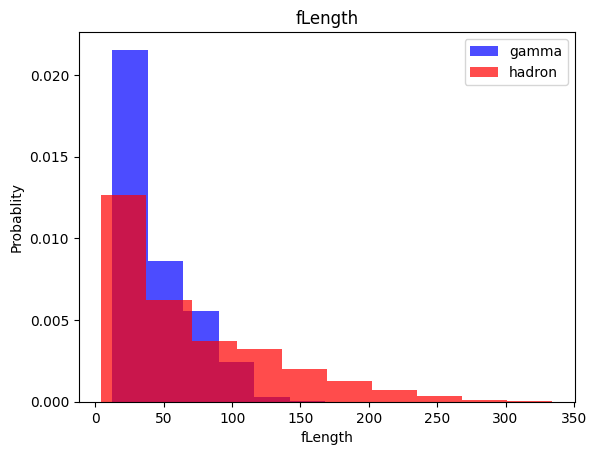

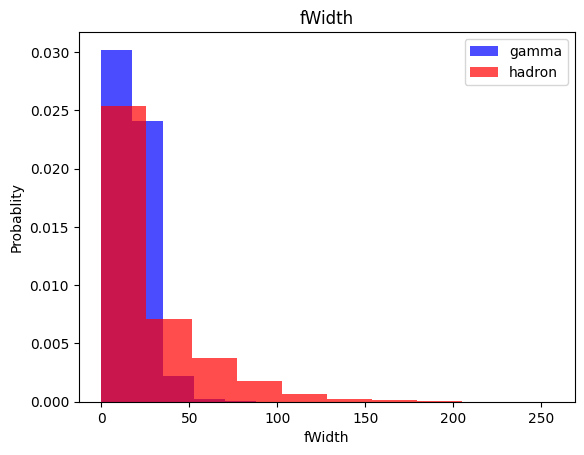

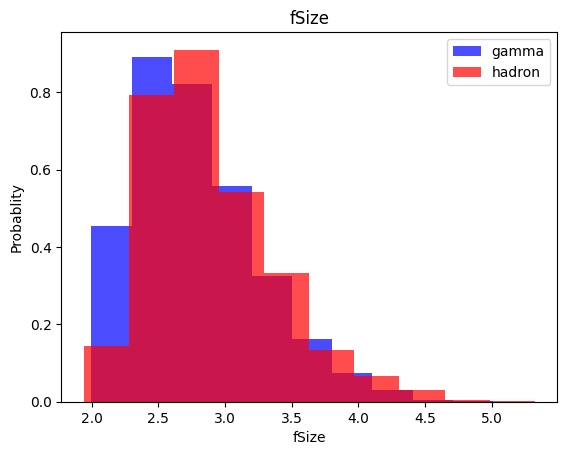

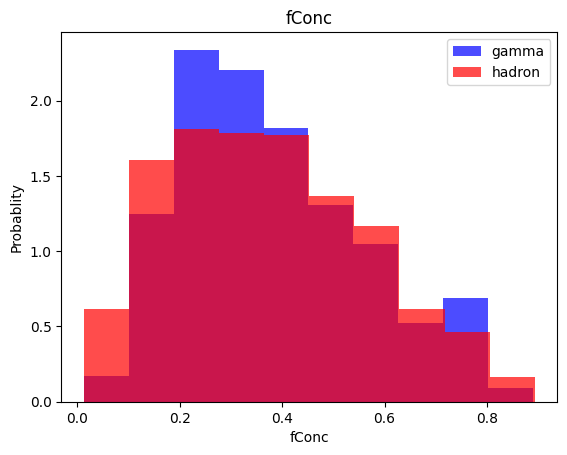

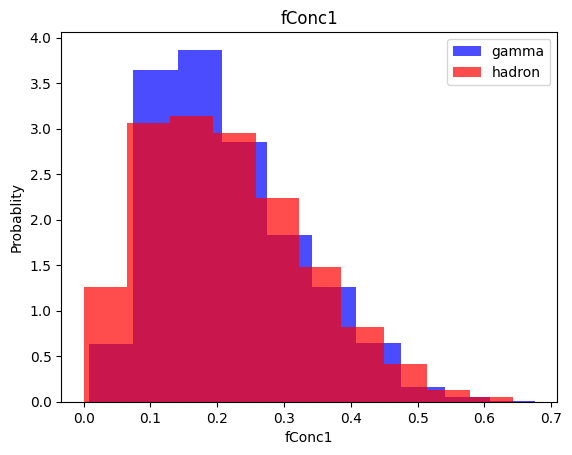

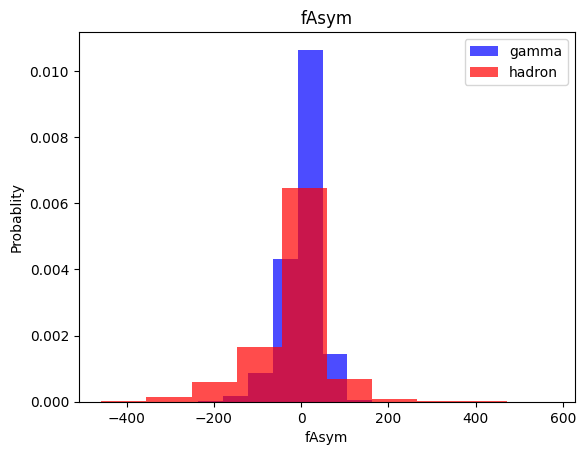

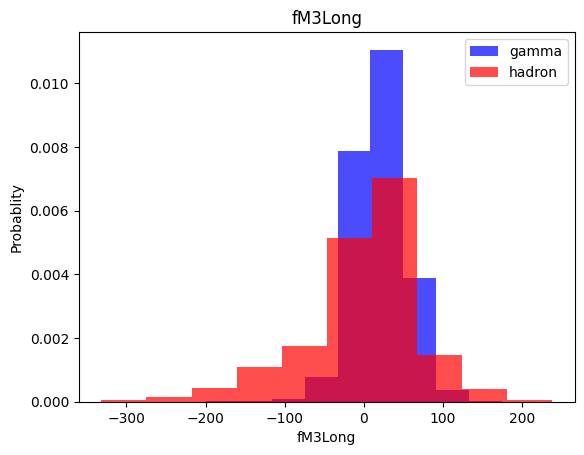

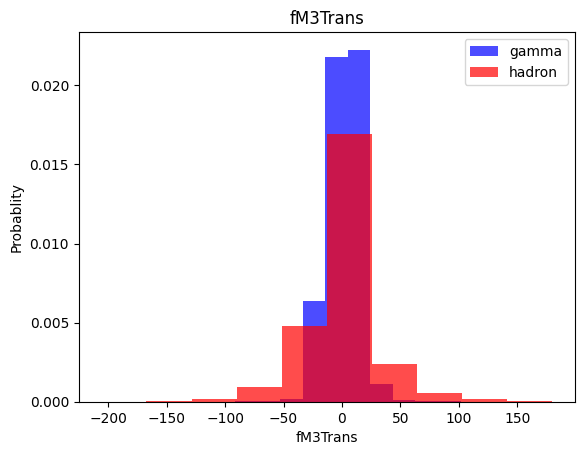

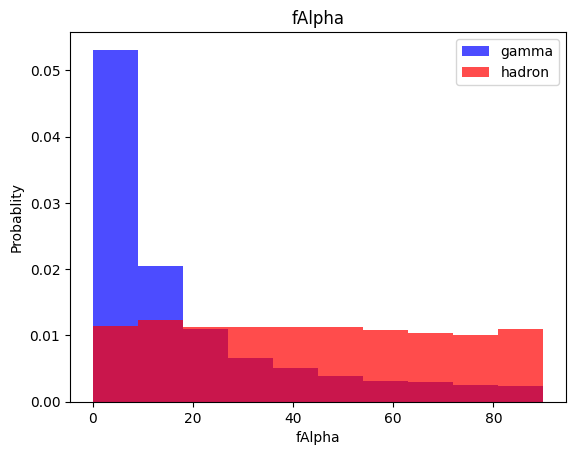

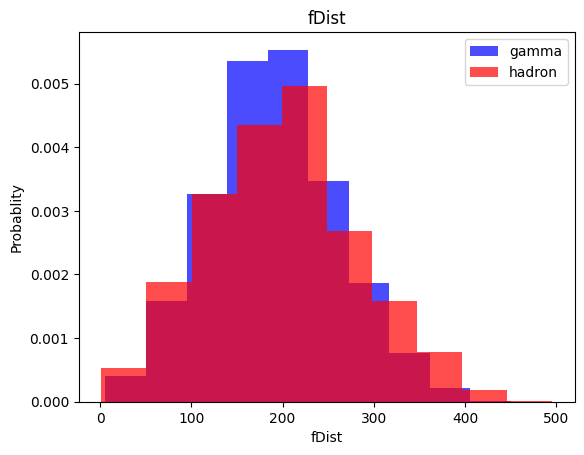

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation, and Test Datasets

In [ ]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversampler = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversampler:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversampler = True)
valid, x_valid, y_valid = scale_dataset(valid, oversampler = False)
test, x_test, y_test = scale_dataset(test, oversampler = False)

#k Nearest Neighbors (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 37)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=37)

In [ ]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1339
           1       0.85      0.89      0.87      2465

    accuracy                           0.83      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.83      0.82      3804



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1339
           1       0.73      0.90      0.81      2465

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1339
           1       0.84      0.81      0.83      2465

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



#Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1339
           1       0.89      0.88      0.89      2465

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



#Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss = "binary_crossentropy",
                 metrics=['accuracy'])
  history = nn_model.fit(
  x_train, y_train, epochs=epochs, batch_size = batch_size, validation_split = 0.2,
)
  return nn_model, history

16 nodes, 0 dropout, 0.01 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 5s 4ms/step - loss: 0.3964 - accuracy: 0.8265 - val_loss: 0.5886 - val_accuracy: 0.7177
Epoch 2/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8539 - val_loss: 0.5501 - val_accuracy: 0.7064
Epoch 3/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8574 - val_loss: 0.4416 - val_accuracy: 0.7522
Epoch 4/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8606 - val_loss: 0.5539 - val_accuracy: 0.7037
Epoch 5/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8622 - val_loss: 0.4245 - val_accuracy: 0.7635
Epoch 6/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.8656 - val_loss: 0.4467 - val_accuracy: 0.7682
Epoch 7/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3197 - accu

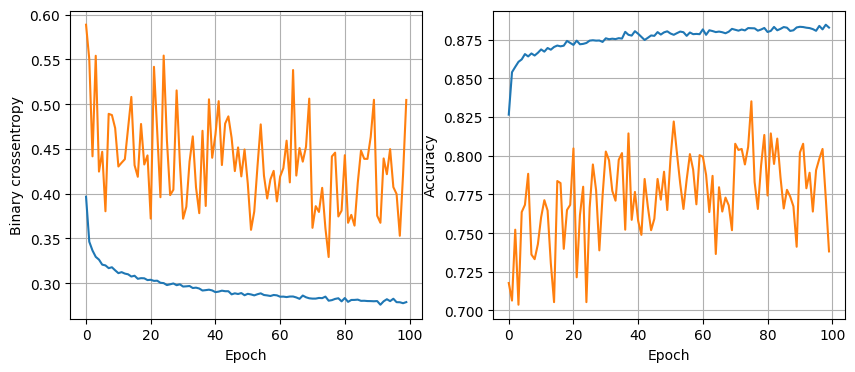

119/119 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8625
16 nodes, 0 dropout, 0.01 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8142 - val_loss: 0.5312 - val_accuracy: 0.7505
Epoch 2/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8492 - val_loss: 0.4908 - val_accuracy: 0.7355
Epoch 3/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8572 - val_loss: 0.4957 - val_accuracy: 0.7532
Epoch 4/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8605 - val_loss: 0.4693 - val_accuracy: 0.7642
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8615 - val_loss: 0.5055 - val_accuracy: 0.7368
Epoch 6/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8621 - val_loss: 0.4318 - val_accuracy: 0.7706

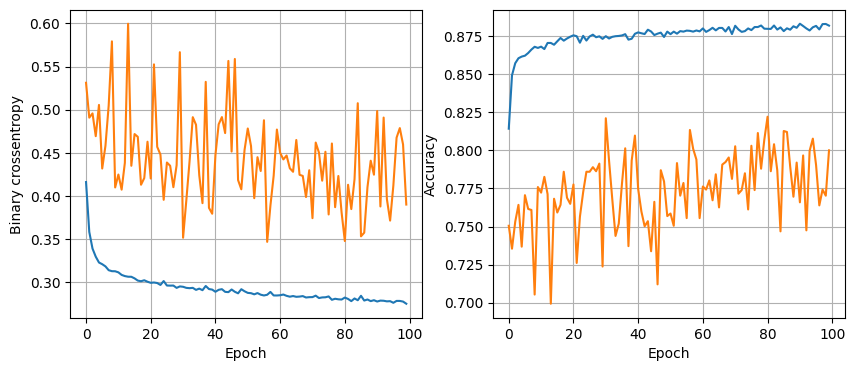

119/119 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8659
16 nodes, 0 dropout, 0.01 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.4605 - accuracy: 0.7826 - val_loss: 0.6227 - val_accuracy: 0.6669
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8446 - val_loss: 0.5087 - val_accuracy: 0.7421
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8513 - val_loss: 0.4545 - val_accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8605 - val_loss: 0.5014 - val_accuracy: 0.7515
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8618 - val_loss: 0.4991 - val_accuracy: 0.7535
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.8632 - val_loss: 0.5323 - val_accuracy: 0.7191
Epoch 7/10

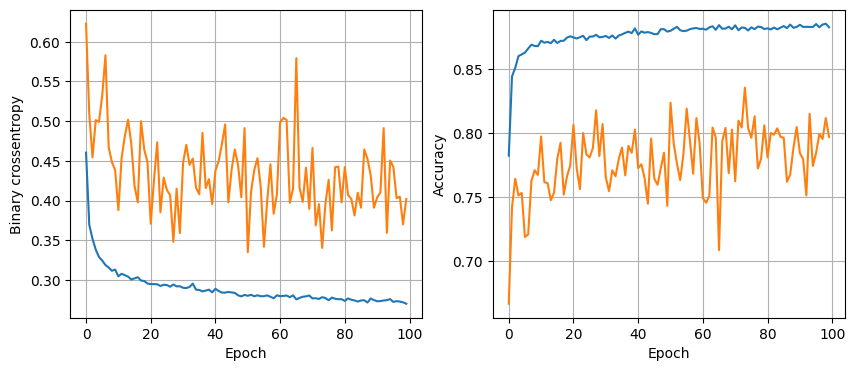

119/119 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8657
16 nodes, 0 dropout, 0.005 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 0.4114 - accuracy: 0.8126 - val_loss: 0.5619 - val_accuracy: 0.7047
Epoch 2/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.8537 - val_loss: 0.5778 - val_accuracy: 0.7057
Epoch 3/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8590 - val_loss: 0.4971 - val_accuracy: 0.7291
Epoch 4/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3243 - accuracy: 0.8625 - val_loss: 0.4456 - val_accuracy: 0.7659
Epoch 5/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3203 - accuracy: 0.8674 - val_loss: 0.5735 - val_accuracy: 0.6963
Epoch 6/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3172 - accuracy: 0.8663 - val_loss: 0.4535 - val_accuracy: 0.758

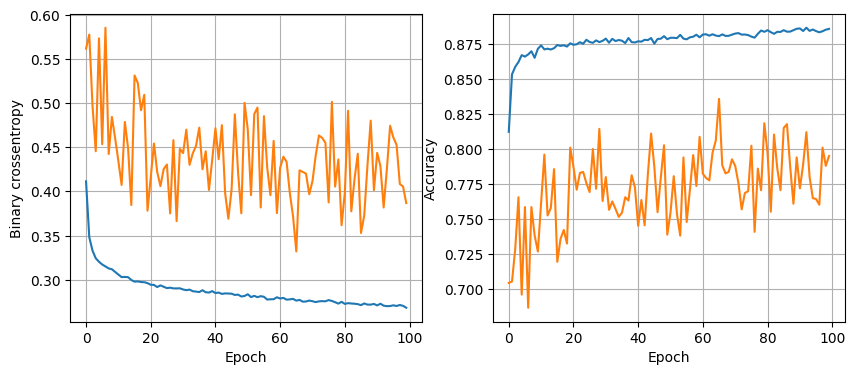

119/119 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8630
16 nodes, 0 dropout, 0.005 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 3s 7ms/step - loss: 0.4151 - accuracy: 0.8133 - val_loss: 0.5742 - val_accuracy: 0.7007
Epoch 2/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3613 - accuracy: 0.8491 - val_loss: 0.5669 - val_accuracy: 0.7074
Epoch 3/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3412 - accuracy: 0.8581 - val_loss: 0.5411 - val_accuracy: 0.7304
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3374 - accuracy: 0.8587 - val_loss: 0.3948 - val_accuracy: 0.7893
Epoch 5/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8635 - val_loss: 0.4285 - val_accuracy: 0.7826
Epoch 6/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8668 - val_loss: 0.6588 - val_accuracy: 0.680

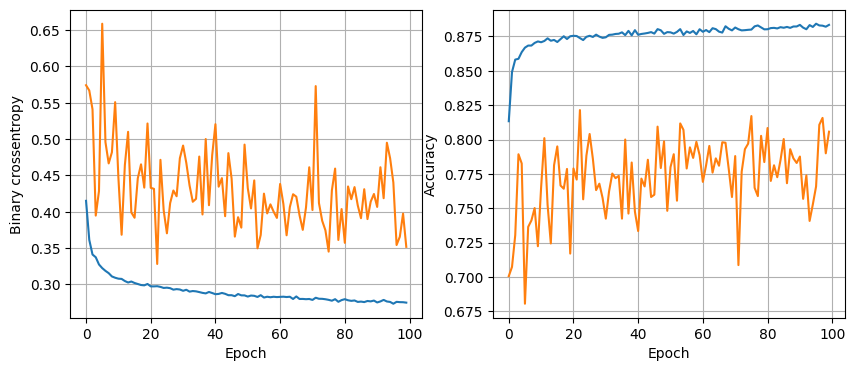

119/119 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8623
16 nodes, 0 dropout, 0.005 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4578 - accuracy: 0.7822 - val_loss: 0.5835 - val_accuracy: 0.6512
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3744 - accuracy: 0.8383 - val_loss: 0.4751 - val_accuracy: 0.7642
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8543 - val_loss: 0.5192 - val_accuracy: 0.7452
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8592 - val_loss: 0.5295 - val_accuracy: 0.7355
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8597 - val_loss: 0.4981 - val_accuracy: 0.7435
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8645 - val_loss: 0.4499 - val_accuracy: 0.7599
Epoch 7/1

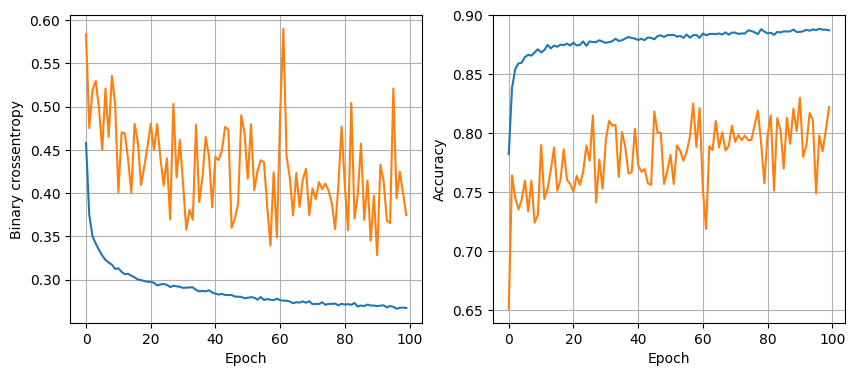

119/119 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8670
16 nodes, 0 dropout, 0.001 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 0.4918 - accuracy: 0.7758 - val_loss: 0.6393 - val_accuracy: 0.6227
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8218 - val_loss: 0.6202 - val_accuracy: 0.6542
Epoch 3/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8356 - val_loss: 0.5910 - val_accuracy: 0.6829
Epoch 4/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3677 - accuracy: 0.8441 - val_loss: 0.6078 - val_accuracy: 0.6883
Epoch 5/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.8479 - val_loss: 0.5405 - val_accuracy: 0.7237
Epoch 6/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8533 - val_loss: 0.5167 - val_accuracy: 0.740

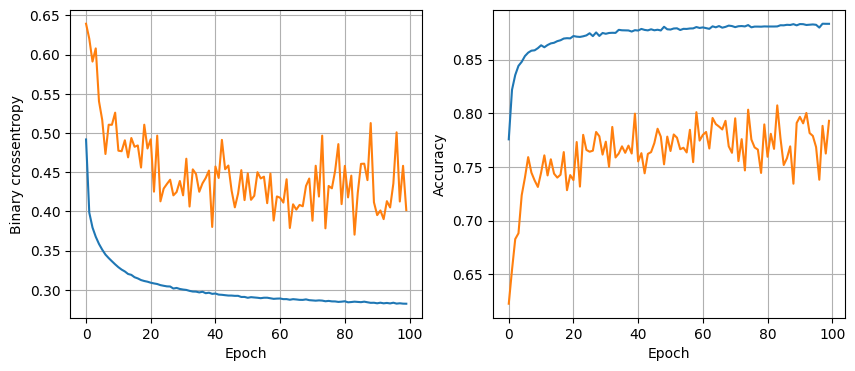

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8633
16 nodes, 0 dropout, 0.001 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 4ms/step - loss: 0.5400 - accuracy: 0.7605 - val_loss: 0.6144 - val_accuracy: 0.6191
Epoch 2/100
187/187 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.8073 - val_loss: 0.6331 - val_accuracy: 0.6298
Epoch 3/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8251 - val_loss: 0.5886 - val_accuracy: 0.6679
Epoch 4/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8363 - val_loss: 0.5529 - val_accuracy: 0.6946
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8450 - val_loss: 0.5693 - val_accuracy: 0.7000
Epoch 6/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8497 - val_loss: 0.5268 - val_accuracy: 0.729

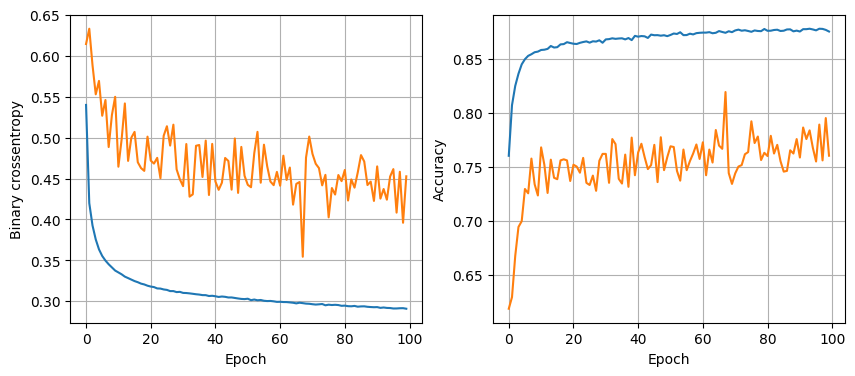

119/119 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8617
16 nodes, 0 dropout, 0.001 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 2s 6ms/step - loss: 0.5859 - accuracy: 0.6997 - val_loss: 0.7198 - val_accuracy: 0.5137
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4420 - accuracy: 0.8019 - val_loss: 0.6457 - val_accuracy: 0.6258
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4017 - accuracy: 0.8221 - val_loss: 0.5891 - val_accuracy: 0.6759
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.8318 - val_loss: 0.5623 - val_accuracy: 0.6916
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8371 - val_loss: 0.5606 - val_accuracy: 0.6970
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3693 - accuracy: 0.8426 - val_loss: 0.5636 - val_accuracy: 0.7020
Epoch 7/1

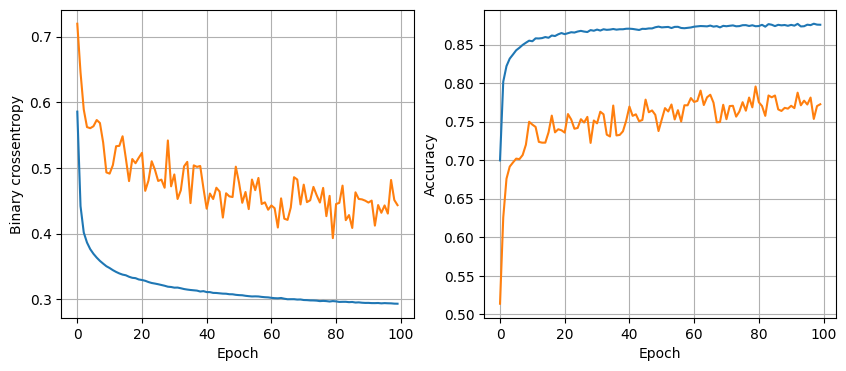

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8620
16 nodes, 0.2 dropout, 0.01 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 0.4446 - accuracy: 0.8028 - val_loss: 0.5700 - val_accuracy: 0.6923
Epoch 2/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.8349 - val_loss: 0.4737 - val_accuracy: 0.7589
Epoch 3/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8416 - val_loss: 0.4753 - val_accuracy: 0.7552
Epoch 4/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3681 - accuracy: 0.8418 - val_loss: 0.5080 - val_accuracy: 0.7110
Epoch 5/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8431 - val_loss: 0.4572 - val_accuracy: 0.7251
Epoch 6/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8441 - val_loss: 0.5447 - val_accuracy: 0.67

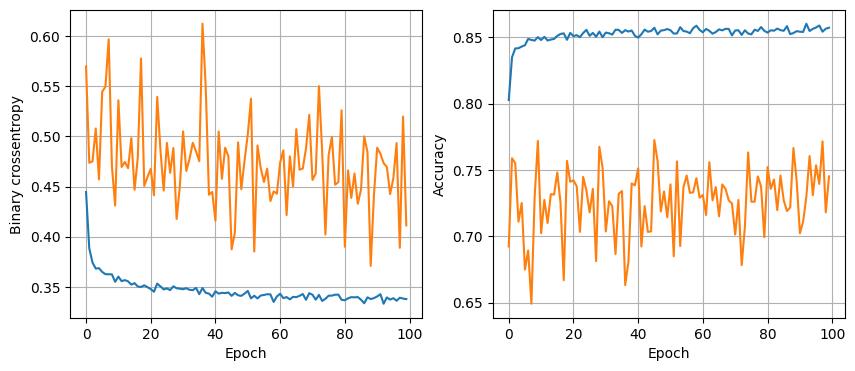

119/119 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8638
16 nodes, 0.2 dropout, 0.01 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 4ms/step - loss: 0.4618 - accuracy: 0.7870 - val_loss: 0.6190 - val_accuracy: 0.6425
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3979 - accuracy: 0.8287 - val_loss: 0.6384 - val_accuracy: 0.6515
Epoch 3/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3745 - accuracy: 0.8416 - val_loss: 0.5380 - val_accuracy: 0.6883
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3684 - accuracy: 0.8431 - val_loss: 0.5203 - val_accuracy: 0.7211
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.8516 - val_loss: 0.5971 - val_accuracy: 0.6365
Epoch 6/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3574 - accuracy: 0.8504 - val_loss: 0.5210 - val_accuracy: 0.71

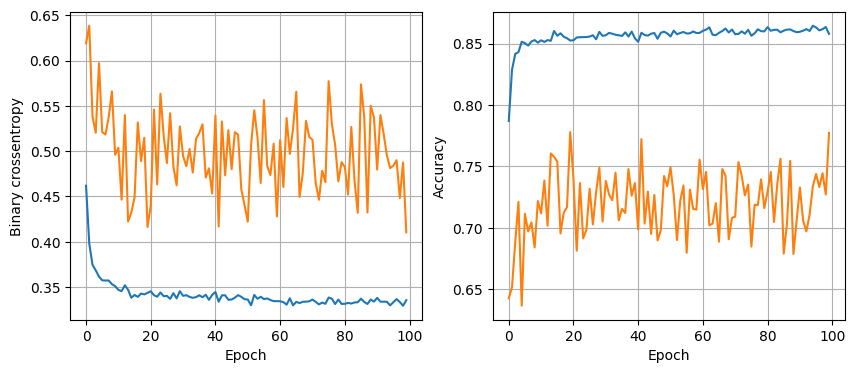

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8583
16 nodes, 0.2 dropout, 0.01 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5056 - accuracy: 0.7590 - val_loss: 0.6081 - val_accuracy: 0.6361
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8149 - val_loss: 0.6162 - val_accuracy: 0.6689
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8339 - val_loss: 0.4936 - val_accuracy: 0.7455
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3759 - accuracy: 0.8406 - val_loss: 0.4922 - val_accuracy: 0.7328
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8476 - val_loss: 0.4960 - val_accuracy: 0.7194
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8471 - val_loss: 0.5316 - val_accuracy: 0.6963
Epoch 7/

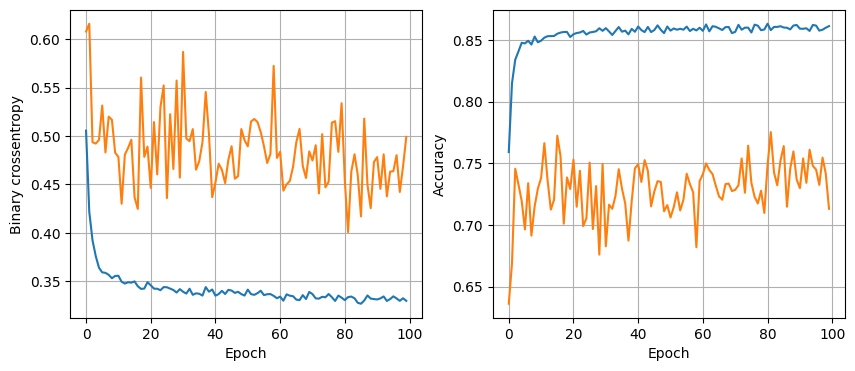

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8620
16 nodes, 0.2 dropout, 0.005 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 0.4553 - accuracy: 0.7890 - val_loss: 0.5954 - val_accuracy: 0.6803
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3978 - accuracy: 0.8286 - val_loss: 0.5050 - val_accuracy: 0.7368
Epoch 3/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3856 - accuracy: 0.8380 - val_loss: 0.5270 - val_accuracy: 0.7201
Epoch 4/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3718 - accuracy: 0.8403 - val_loss: 0.5379 - val_accuracy: 0.7181
Epoch 5/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3651 - accuracy: 0.8450 - val_loss: 0.4786 - val_accuracy: 0.7418
Epoch 6/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3632 - accuracy: 0.8477 - val_loss: 0.4801 - val_accuracy: 0.7

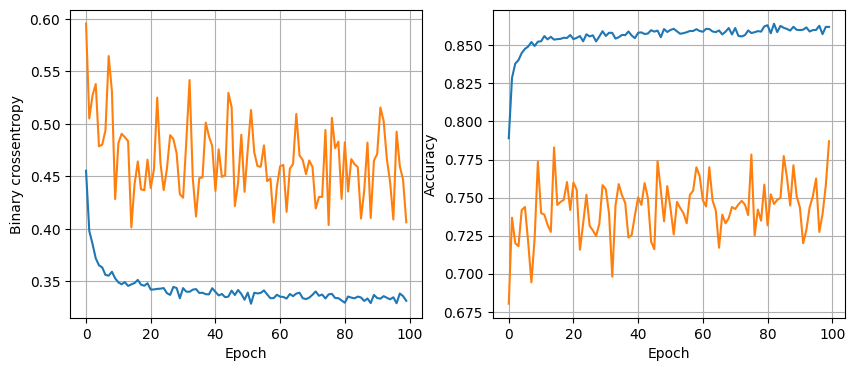

119/119 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8594
16 nodes, 0.2 dropout, 0.005 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 5ms/step - loss: 0.5001 - accuracy: 0.7613 - val_loss: 0.6209 - val_accuracy: 0.6298
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.8250 - val_loss: 0.5618 - val_accuracy: 0.6963
Epoch 3/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3901 - accuracy: 0.8372 - val_loss: 0.5238 - val_accuracy: 0.7181
Epoch 4/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3711 - accuracy: 0.8443 - val_loss: 0.5952 - val_accuracy: 0.6679
Epoch 5/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3622 - accuracy: 0.8468 - val_loss: 0.4896 - val_accuracy: 0.7161
Epoch 6/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3616 - accuracy: 0.8473 - val_loss: 0.5781 - val_accuracy: 0.6

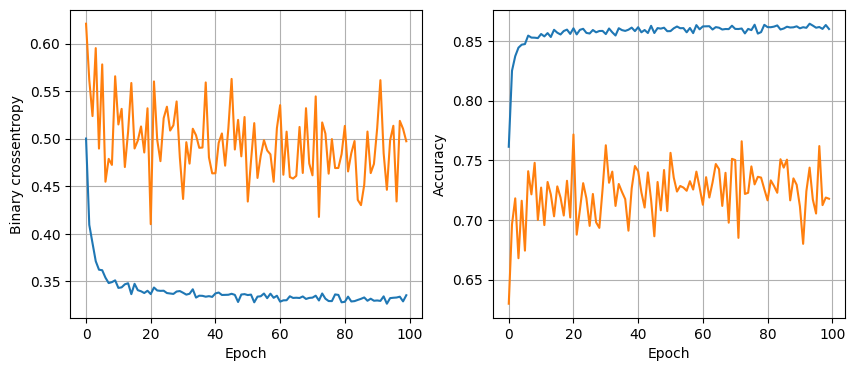

119/119 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8630
16 nodes, 0.2 dropout, 0.005 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5322 - accuracy: 0.7375 - val_loss: 0.6787 - val_accuracy: 0.5880
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.7969 - val_loss: 0.6277 - val_accuracy: 0.6241
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8110 - val_loss: 0.5676 - val_accuracy: 0.6920
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8273 - val_loss: 0.5688 - val_accuracy: 0.7100
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.8328 - val_loss: 0.5813 - val_accuracy: 0.6736
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8428 - val_loss: 0.5140 - val_accuracy: 0.7408
Epoch 7

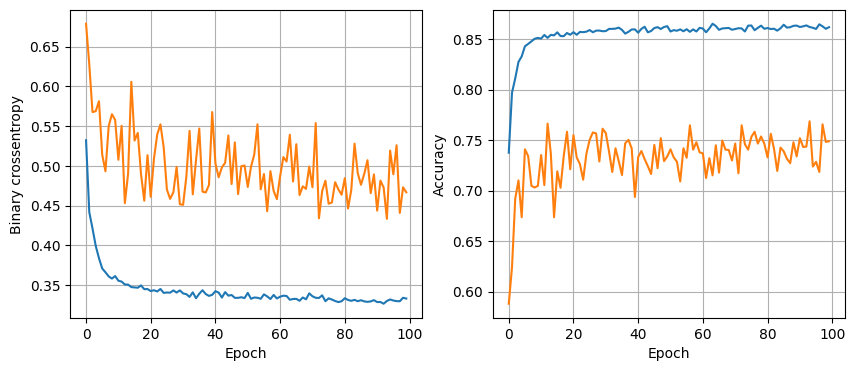

119/119 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8620
16 nodes, 0.2 dropout, 0.001 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 0.5979 - accuracy: 0.6788 - val_loss: 0.6662 - val_accuracy: 0.5415
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 0.4636 - accuracy: 0.7861 - val_loss: 0.5843 - val_accuracy: 0.6592
Epoch 3/100
374/374 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 0.8038 - val_loss: 0.6113 - val_accuracy: 0.6468
Epoch 4/100
374/374 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.8152 - val_loss: 0.5984 - val_accuracy: 0.6726
Epoch 5/100
374/374 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8214 - val_loss: 0.5373 - val_accuracy: 0.7134
Epoch 6/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8279 - val_loss: 0.5653 - val_accuracy: 0.7

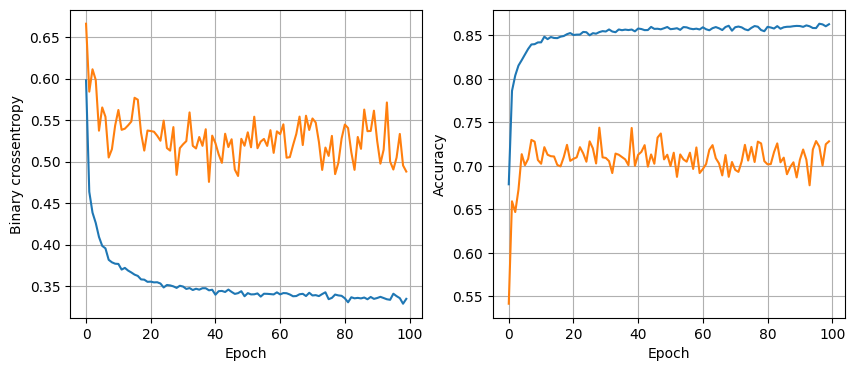

119/119 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8601
16 nodes, 0.2 dropout, 0.001 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 4ms/step - loss: 0.5754 - accuracy: 0.7089 - val_loss: 0.7051 - val_accuracy: 0.5712
Epoch 2/100
187/187 [==============================] - 1s 3ms/step - loss: 0.4736 - accuracy: 0.7792 - val_loss: 0.6713 - val_accuracy: 0.6127
Epoch 3/100
187/187 [==============================] - 1s 3ms/step - loss: 0.4497 - accuracy: 0.7989 - val_loss: 0.6221 - val_accuracy: 0.6395
Epoch 4/100
187/187 [==============================] - 1s 3ms/step - loss: 0.4313 - accuracy: 0.8104 - val_loss: 0.6213 - val_accuracy: 0.6548
Epoch 5/100
187/187 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.8204 - val_loss: 0.5658 - val_accuracy: 0.6926
Epoch 6/100
187/187 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8258 - val_loss: 0.5524 - val_accuracy: 0.7

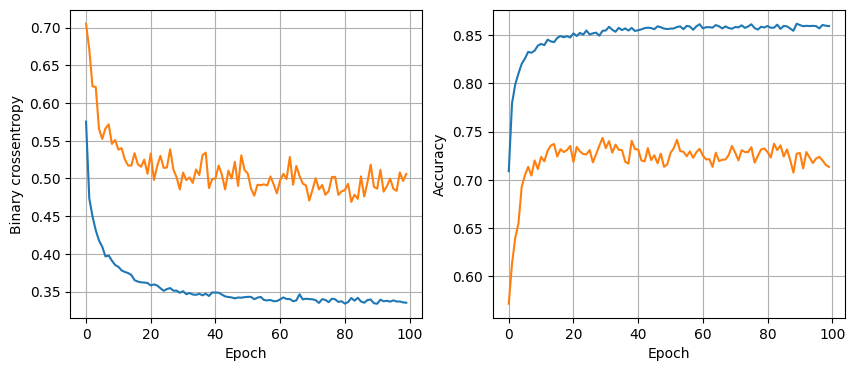

119/119 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8575
16 nodes, 0.2 dropout, 0.001 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.6542 - accuracy: 0.6446 - val_loss: 0.8344 - val_accuracy: 0.3532
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7301 - val_loss: 0.7114 - val_accuracy: 0.5843
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7686 - val_loss: 0.6628 - val_accuracy: 0.6074
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4641 - accuracy: 0.7825 - val_loss: 0.6590 - val_accuracy: 0.6013
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.7914 - val_loss: 0.6338 - val_accuracy: 0.6217
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.7945 - val_loss: 0.6159 - val_accuracy: 0.6244
Epoch 7

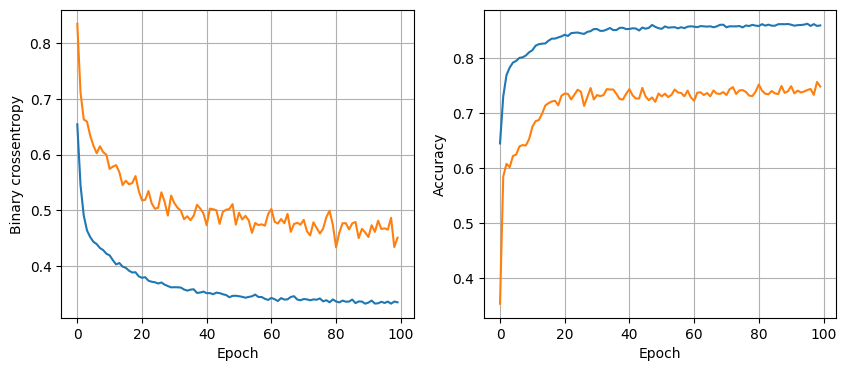

119/119 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8623
32 nodes, 0 dropout, 0.01 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 0.3949 - accuracy: 0.8283 - val_loss: 0.5989 - val_accuracy: 0.7114
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8573 - val_loss: 0.4050 - val_accuracy: 0.7763
Epoch 3/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3323 - accuracy: 0.8587 - val_loss: 0.5110 - val_accuracy: 0.7043
Epoch 4/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3208 - accuracy: 0.8646 - val_loss: 0.4166 - val_accuracy: 0.7856
Epoch 5/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.8652 - val_loss: 0.4668 - val_accuracy: 0.7699
Epoch 6/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3144 - accuracy: 0.8668 - val_loss: 0.4368 - val_accuracy: 0.7518

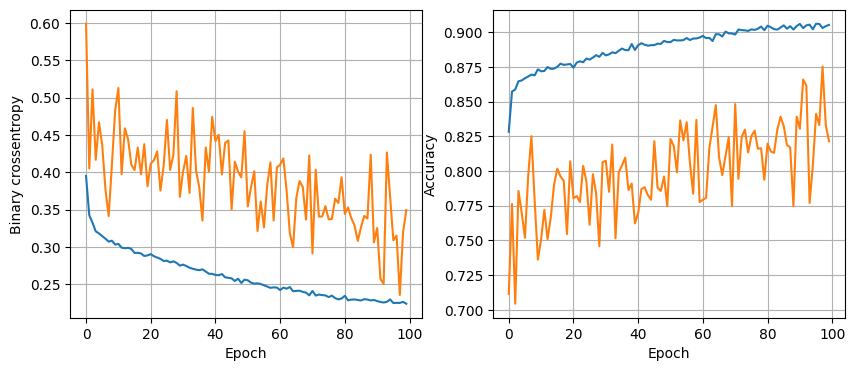

119/119 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8567
32 nodes, 0 dropout, 0.01 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8275 - val_loss: 0.5286 - val_accuracy: 0.7475
Epoch 2/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8555 - val_loss: 0.5684 - val_accuracy: 0.6732
Epoch 3/100
187/187 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8629 - val_loss: 0.4878 - val_accuracy: 0.7237
Epoch 4/100
187/187 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8640 - val_loss: 0.4726 - val_accuracy: 0.7441
Epoch 5/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.8631 - val_loss: 0.4447 - val_accuracy: 0.7739
Epoch 6/100
187/187 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8683 - val_loss: 0.3798 - val_accuracy: 0.7856

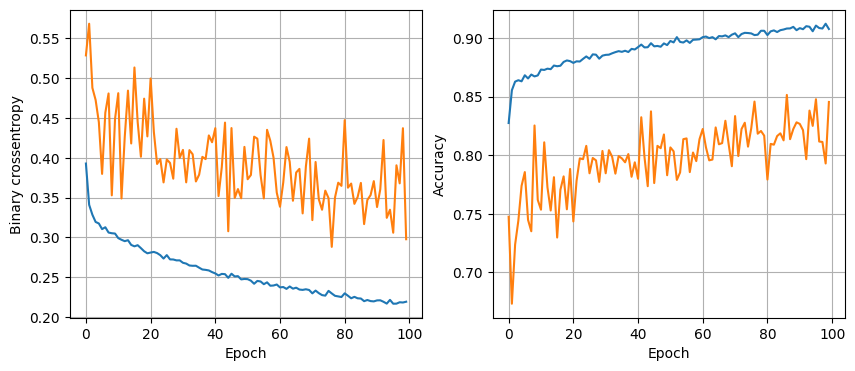

119/119 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.8452
32 nodes, 0 dropout, 0.01 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 2s 6ms/step - loss: 0.4118 - accuracy: 0.8113 - val_loss: 0.5416 - val_accuracy: 0.7324
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.8550 - val_loss: 0.5165 - val_accuracy: 0.7492
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8604 - val_loss: 0.5608 - val_accuracy: 0.7037
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8628 - val_loss: 0.4834 - val_accuracy: 0.7639
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3195 - accuracy: 0.8652 - val_loss: 0.3970 - val_accuracy: 0.7977
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8676 - val_loss: 0.4257 - val_accuracy: 0.7773
Epoch 7/10

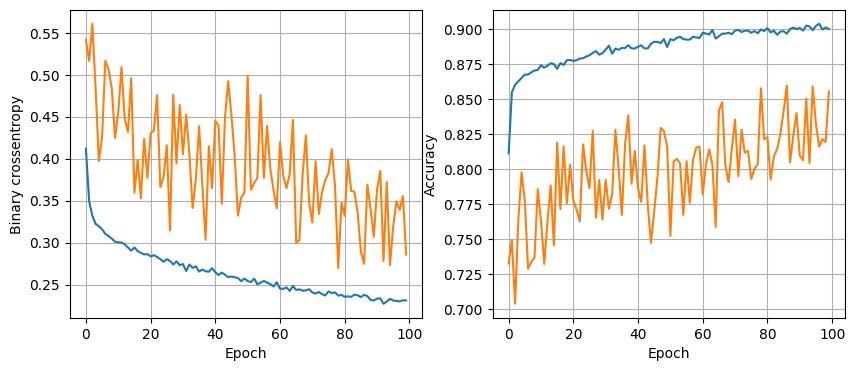

119/119 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8467
32 nodes, 0 dropout, 0.005 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 0.3966 - accuracy: 0.8287 - val_loss: 0.4373 - val_accuracy: 0.7769
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8521 - val_loss: 0.6125 - val_accuracy: 0.6676
Epoch 3/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8605 - val_loss: 0.4706 - val_accuracy: 0.7498
Epoch 4/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8640 - val_loss: 0.4037 - val_accuracy: 0.7813
Epoch 5/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3162 - accuracy: 0.8651 - val_loss: 0.4486 - val_accuracy: 0.7656
Epoch 6/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8671 - val_loss: 0.3935 - val_accuracy: 0.795

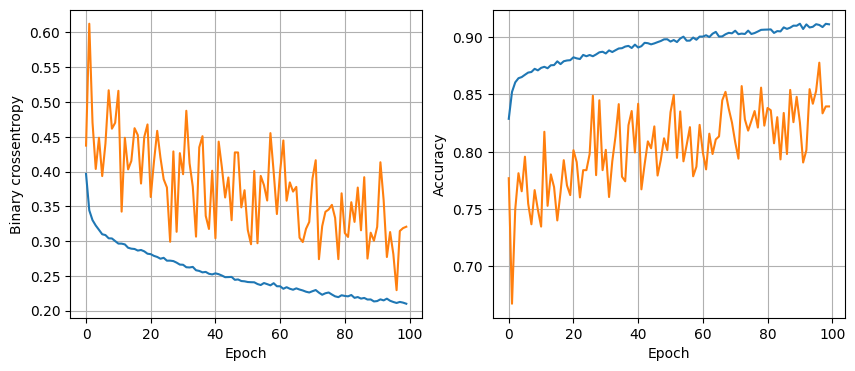

119/119 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8612
32 nodes, 0 dropout, 0.005 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 5ms/step - loss: 0.4092 - accuracy: 0.8151 - val_loss: 0.6295 - val_accuracy: 0.6880
Epoch 2/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.8538 - val_loss: 0.4653 - val_accuracy: 0.7572
Epoch 3/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3315 - accuracy: 0.8593 - val_loss: 0.4860 - val_accuracy: 0.7625
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8605 - val_loss: 0.4655 - val_accuracy: 0.7569
Epoch 5/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3165 - accuracy: 0.8654 - val_loss: 0.4768 - val_accuracy: 0.7515
Epoch 6/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3137 - accuracy: 0.8678 - val_loss: 0.4450 - val_accuracy: 0.770

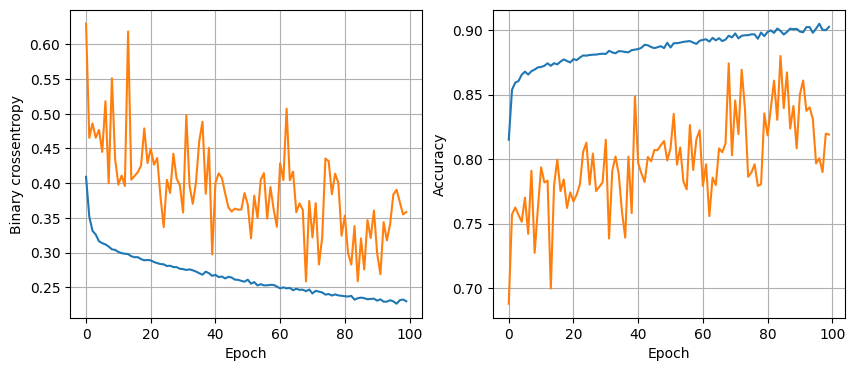

119/119 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8654
32 nodes, 0 dropout, 0.005 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4184 - accuracy: 0.8116 - val_loss: 0.5816 - val_accuracy: 0.7054
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8523 - val_loss: 0.4189 - val_accuracy: 0.7863
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3374 - accuracy: 0.8605 - val_loss: 0.4996 - val_accuracy: 0.7401
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.8635 - val_loss: 0.4891 - val_accuracy: 0.7398
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.8651 - val_loss: 0.4370 - val_accuracy: 0.7769
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8625 - val_loss: 0.4916 - val_accuracy: 0.7361
Epoch 7/1

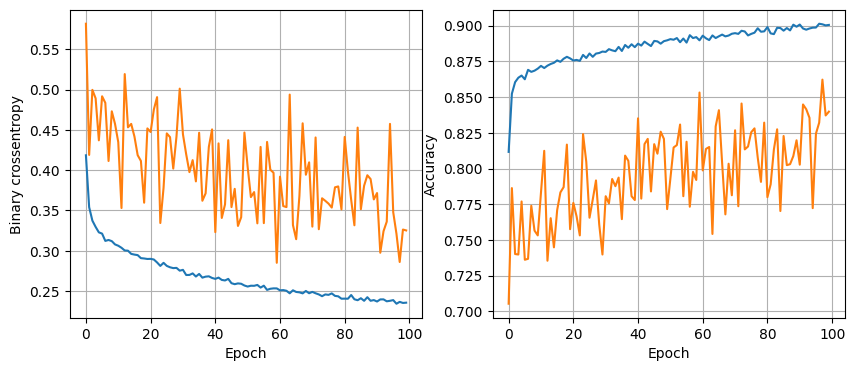

119/119 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8651
32 nodes, 0 dropout, 0.001 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 4ms/step - loss: 0.4479 - accuracy: 0.7910 - val_loss: 0.5304 - val_accuracy: 0.7013
Epoch 2/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3712 - accuracy: 0.8429 - val_loss: 0.6153 - val_accuracy: 0.6776
Epoch 3/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3541 - accuracy: 0.8534 - val_loss: 0.5152 - val_accuracy: 0.7448
Epoch 4/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8577 - val_loss: 0.4800 - val_accuracy: 0.7702
Epoch 5/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8596 - val_loss: 0.5334 - val_accuracy: 0.7405
Epoch 6/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8620 - val_loss: 0.4812 - val_accuracy: 0.758

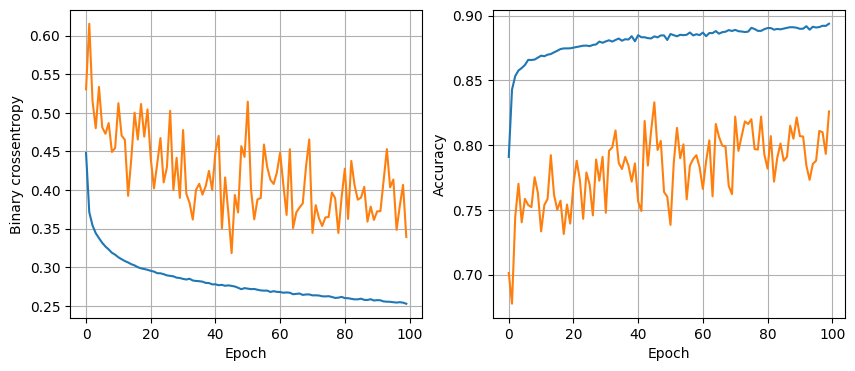

119/119 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8599
32 nodes, 0 dropout, 0.001 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 4ms/step - loss: 0.4738 - accuracy: 0.7822 - val_loss: 0.5957 - val_accuracy: 0.6271
Epoch 2/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3893 - accuracy: 0.8247 - val_loss: 0.5843 - val_accuracy: 0.6890
Epoch 3/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8475 - val_loss: 0.4950 - val_accuracy: 0.7478
Epoch 4/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8560 - val_loss: 0.5014 - val_accuracy: 0.7425
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3369 - accuracy: 0.8617 - val_loss: 0.5096 - val_accuracy: 0.7378
Epoch 6/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3313 - accuracy: 0.8635 - val_loss: 0.4397 - val_accuracy: 0.778

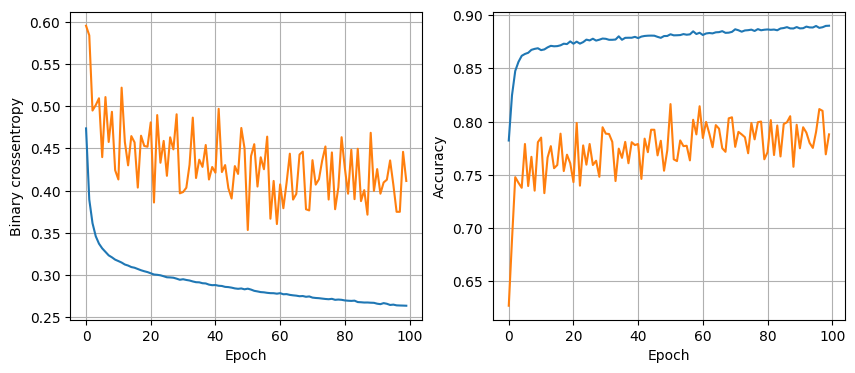

119/119 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8665
32 nodes, 0 dropout, 0.001 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 2s 6ms/step - loss: 0.5702 - accuracy: 0.7141 - val_loss: 0.6253 - val_accuracy: 0.5967
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.8048 - val_loss: 0.6298 - val_accuracy: 0.6217
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3961 - accuracy: 0.8217 - val_loss: 0.5923 - val_accuracy: 0.6552
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3783 - accuracy: 0.8349 - val_loss: 0.5906 - val_accuracy: 0.6712
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.8418 - val_loss: 0.5804 - val_accuracy: 0.6843
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3548 - accuracy: 0.8483 - val_loss: 0.5823 - val_accuracy: 0.6943
Epoch 7/1

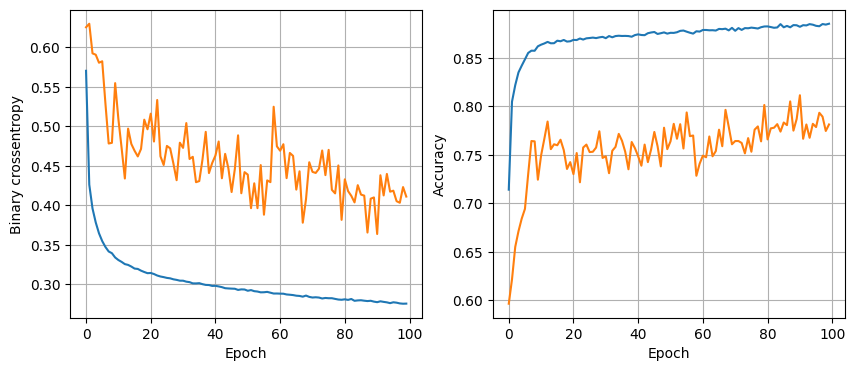

119/119 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.8665
32 nodes, 0.2 dropout, 0.01 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 4ms/step - loss: 0.4184 - accuracy: 0.8166 - val_loss: 0.4990 - val_accuracy: 0.7622
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3762 - accuracy: 0.8424 - val_loss: 0.6355 - val_accuracy: 0.6548
Epoch 3/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3571 - accuracy: 0.8484 - val_loss: 0.3590 - val_accuracy: 0.7977
Epoch 4/100
374/374 [==============================] - 2s 5ms/step - loss: 0.3533 - accuracy: 0.8541 - val_loss: 0.5792 - val_accuracy: 0.6789
Epoch 5/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3509 - accuracy: 0.8527 - val_loss: 0.6023 - val_accuracy: 0.6585
Epoch 6/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3423 - accuracy: 0.8568 - val_loss: 0.4967 - val_accuracy: 0.71

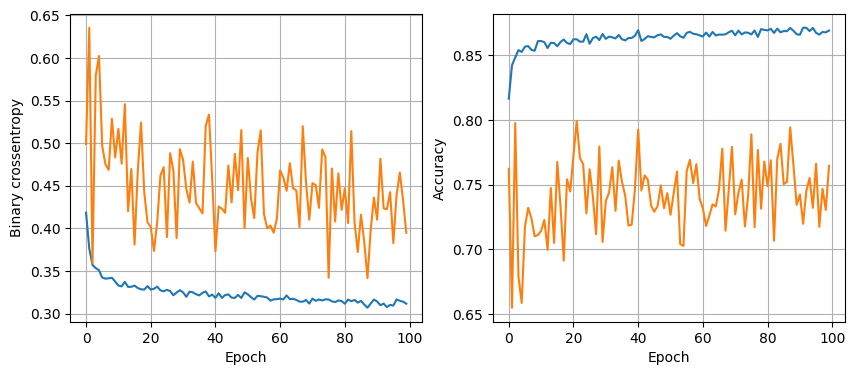

119/119 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8644
32 nodes, 0.2 dropout, 0.01 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 6ms/step - loss: 0.4297 - accuracy: 0.8076 - val_loss: 0.5869 - val_accuracy: 0.6853
Epoch 2/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3702 - accuracy: 0.8418 - val_loss: 0.4752 - val_accuracy: 0.7488
Epoch 3/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8473 - val_loss: 0.3531 - val_accuracy: 0.8064
Epoch 4/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.8518 - val_loss: 0.5250 - val_accuracy: 0.7281
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3473 - accuracy: 0.8554 - val_loss: 0.4788 - val_accuracy: 0.7251
Epoch 6/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3425 - accuracy: 0.8548 - val_loss: 0.4420 - val_accuracy: 0.74

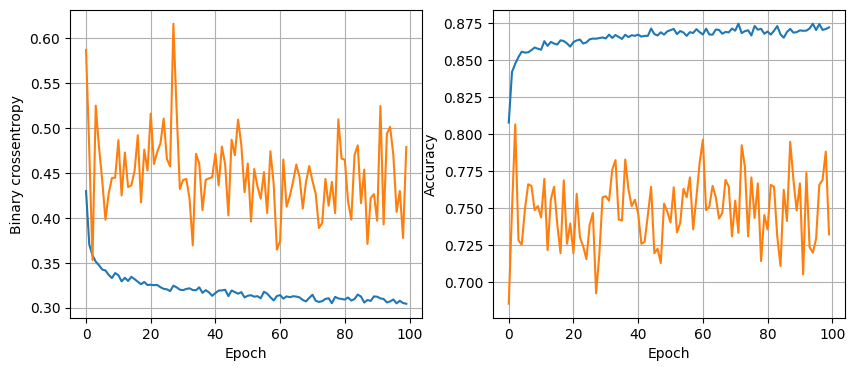

119/119 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8651
32 nodes, 0.2 dropout, 0.01 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4496 - accuracy: 0.7962 - val_loss: 0.6386 - val_accuracy: 0.6538
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3870 - accuracy: 0.8345 - val_loss: 0.4721 - val_accuracy: 0.7532
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8467 - val_loss: 0.6661 - val_accuracy: 0.6565
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.8558 - val_loss: 0.4896 - val_accuracy: 0.7301
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.8519 - val_loss: 0.5008 - val_accuracy: 0.7201
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8540 - val_loss: 0.3861 - val_accuracy: 0.7923
Epoch 7/

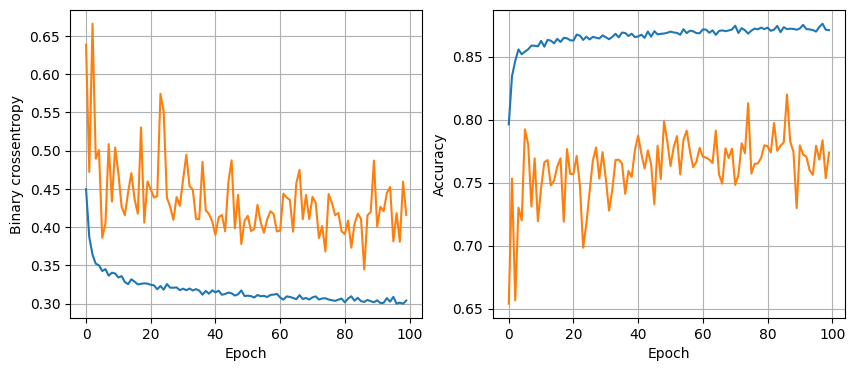

119/119 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8636
32 nodes, 0.2 dropout, 0.005 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 2s 4ms/step - loss: 0.4323 - accuracy: 0.8043 - val_loss: 0.6390 - val_accuracy: 0.6736
Epoch 2/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3782 - accuracy: 0.8406 - val_loss: 0.4471 - val_accuracy: 0.7528
Epoch 3/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8489 - val_loss: 0.4788 - val_accuracy: 0.7508
Epoch 4/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8533 - val_loss: 0.4959 - val_accuracy: 0.7177
Epoch 5/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3422 - accuracy: 0.8561 - val_loss: 0.4952 - val_accuracy: 0.7201
Epoch 6/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3420 - accuracy: 0.8549 - val_loss: 0.4742 - val_accuracy: 0.7

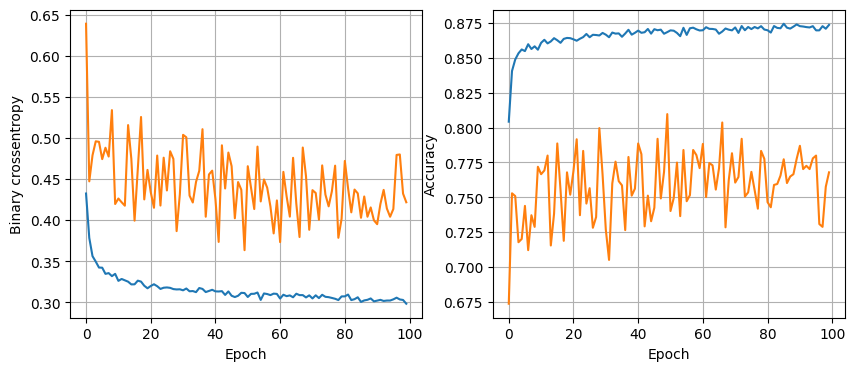

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8665
32 nodes, 0.2 dropout, 0.005 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 5ms/step - loss: 0.4346 - accuracy: 0.8043 - val_loss: 0.5723 - val_accuracy: 0.7023
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3749 - accuracy: 0.8407 - val_loss: 0.4882 - val_accuracy: 0.7495
Epoch 3/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3603 - accuracy: 0.8464 - val_loss: 0.4883 - val_accuracy: 0.7418
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3522 - accuracy: 0.8512 - val_loss: 0.4506 - val_accuracy: 0.7562
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3454 - accuracy: 0.8548 - val_loss: 0.4491 - val_accuracy: 0.7502
Epoch 6/100
187/187 [==============================] - 1s 3ms/step - loss: 0.3409 - accuracy: 0.8551 - val_loss: 0.5128 - val_accuracy: 0.7

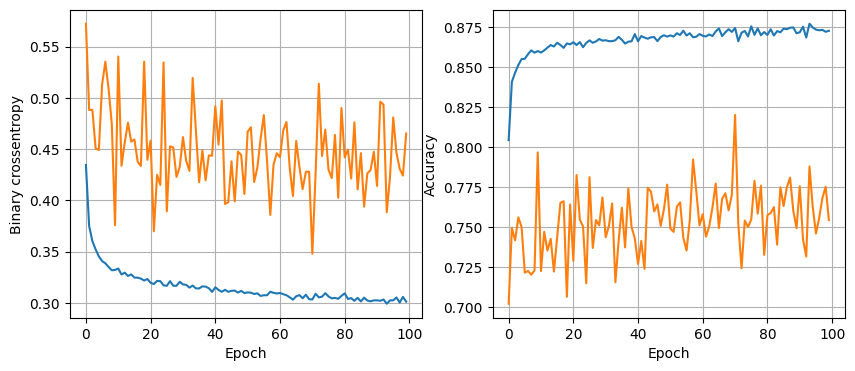

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8665
32 nodes, 0.2 dropout, 0.005 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 2s 8ms/step - loss: 0.4706 - accuracy: 0.7798 - val_loss: 0.6391 - val_accuracy: 0.6351
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3973 - accuracy: 0.8288 - val_loss: 0.5286 - val_accuracy: 0.7227
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3735 - accuracy: 0.8404 - val_loss: 0.4650 - val_accuracy: 0.7512
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3667 - accuracy: 0.8475 - val_loss: 0.5199 - val_accuracy: 0.7197
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3529 - accuracy: 0.8543 - val_loss: 0.4435 - val_accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3423 - accuracy: 0.8569 - val_loss: 0.4942 - val_accuracy: 0.7294
Epoch 7

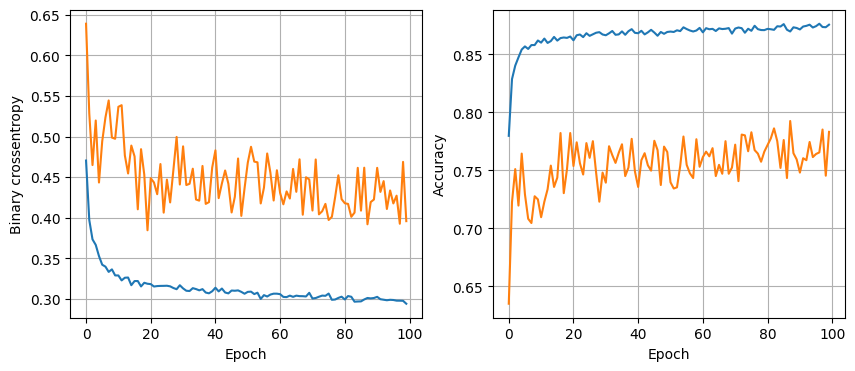

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8659
32 nodes, 0.2 dropout, 0.001 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 3s 5ms/step - loss: 0.5122 - accuracy: 0.7386 - val_loss: 0.6705 - val_accuracy: 0.6013
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.8070 - val_loss: 0.6107 - val_accuracy: 0.6555
Epoch 3/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3996 - accuracy: 0.8266 - val_loss: 0.5256 - val_accuracy: 0.7151
Epoch 4/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3822 - accuracy: 0.8361 - val_loss: 0.5292 - val_accuracy: 0.7127
Epoch 5/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3720 - accuracy: 0.8438 - val_loss: 0.5497 - val_accuracy: 0.7110
Epoch 6/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3665 - accuracy: 0.8457 - val_loss: 0.4949 - val_accuracy: 0.7

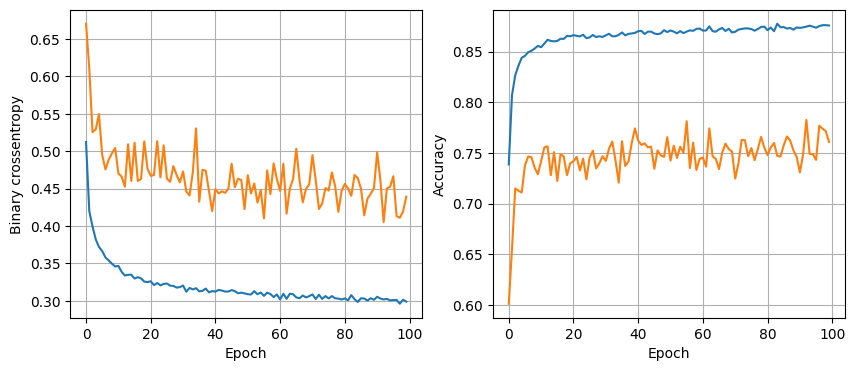

119/119 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8704
32 nodes, 0.2 dropout, 0.001 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 2s 4ms/step - loss: 0.5270 - accuracy: 0.7418 - val_loss: 0.6748 - val_accuracy: 0.6023
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 0.4313 - accuracy: 0.8027 - val_loss: 0.5596 - val_accuracy: 0.6823
Epoch 3/100
187/187 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8168 - val_loss: 0.5779 - val_accuracy: 0.6716
Epoch 4/100
187/187 [==============================] - 1s 5ms/step - loss: 0.4032 - accuracy: 0.8211 - val_loss: 0.5866 - val_accuracy: 0.6769
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3913 - accuracy: 0.8300 - val_loss: 0.5486 - val_accuracy: 0.7107
Epoch 6/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3820 - accuracy: 0.8349 - val_loss: 0.5397 - val_accuracy: 0.7

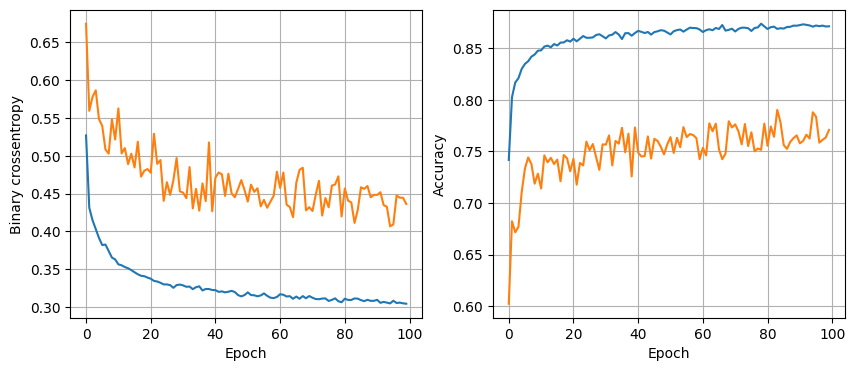

119/119 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8678
32 nodes, 0.2 dropout, 0.001 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 2s 7ms/step - loss: 0.6008 - accuracy: 0.6784 - val_loss: 0.6639 - val_accuracy: 0.5582
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4682 - accuracy: 0.7839 - val_loss: 0.6386 - val_accuracy: 0.6167
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4371 - accuracy: 0.7994 - val_loss: 0.6027 - val_accuracy: 0.6438
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4239 - accuracy: 0.8042 - val_loss: 0.6396 - val_accuracy: 0.6214
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4151 - accuracy: 0.8143 - val_loss: 0.5776 - val_accuracy: 0.6696
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4073 - accuracy: 0.8175 - val_loss: 0.5738 - val_accuracy: 0.6819
Epoch 7

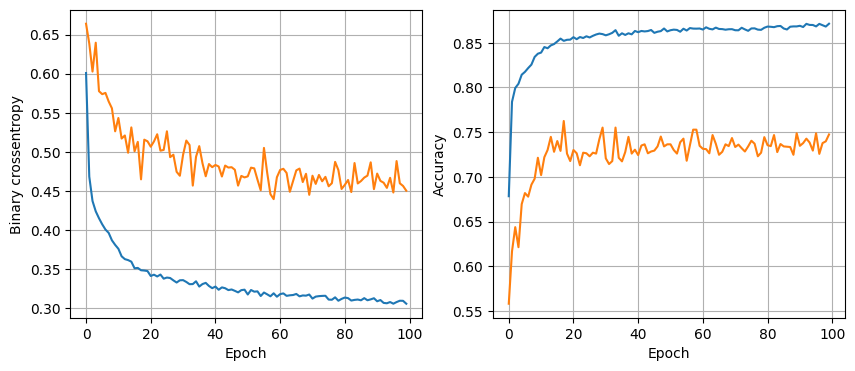

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8675
64 nodes, 0 dropout, 0.01 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 3s 5ms/step - loss: 0.3822 - accuracy: 0.8360 - val_loss: 0.4210 - val_accuracy: 0.7763
Epoch 2/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3411 - accuracy: 0.8550 - val_loss: 0.5434 - val_accuracy: 0.7395
Epoch 3/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8592 - val_loss: 0.4120 - val_accuracy: 0.7712
Epoch 4/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3258 - accuracy: 0.8629 - val_loss: 0.4555 - val_accuracy: 0.7669
Epoch 5/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3200 - accuracy: 0.8662 - val_loss: 0.4504 - val_accuracy: 0.7602
Epoch 6/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3124 - accuracy: 0.8674 - val_loss: 0.4173 - val_accuracy: 0.7528

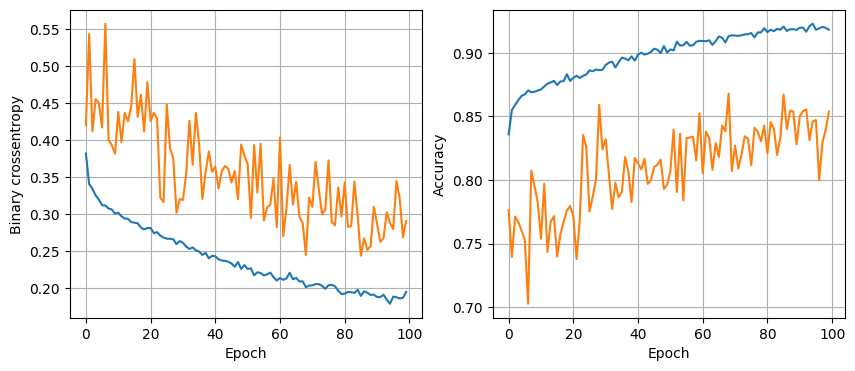

119/119 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.8488
64 nodes, 0 dropout, 0.01 learning rate, 64 batchsize
Epoch 1/100
187/187 [==============================] - 3s 7ms/step - loss: 0.3783 - accuracy: 0.8376 - val_loss: 0.5418 - val_accuracy: 0.6980
Epoch 2/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3386 - accuracy: 0.8562 - val_loss: 0.5041 - val_accuracy: 0.7314
Epoch 3/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8610 - val_loss: 0.4540 - val_accuracy: 0.7505
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3227 - accuracy: 0.8651 - val_loss: 0.3479 - val_accuracy: 0.8281
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3130 - accuracy: 0.8672 - val_loss: 0.3895 - val_accuracy: 0.7916
Epoch 6/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3127 - accuracy: 0.8679 - val_loss: 0.4997 - val_accuracy: 0.7341

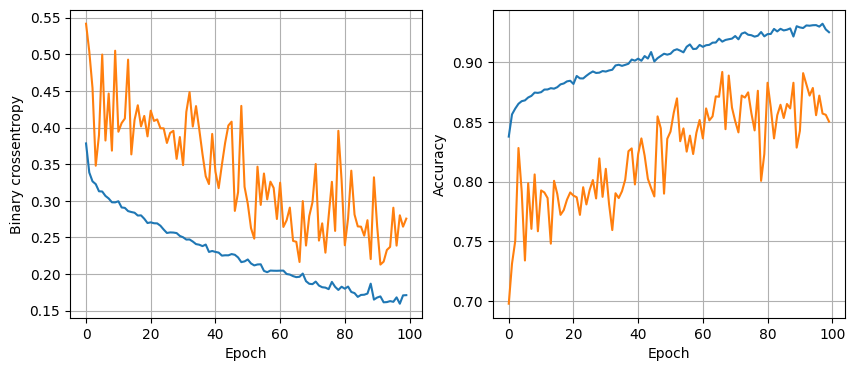

119/119 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.8596
64 nodes, 0 dropout, 0.01 learning rate, 128 batchsize
Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3887 - accuracy: 0.8317 - val_loss: 0.4745 - val_accuracy: 0.7548
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3417 - accuracy: 0.8559 - val_loss: 0.5100 - val_accuracy: 0.7525
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3295 - accuracy: 0.8602 - val_loss: 0.4576 - val_accuracy: 0.7375
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8649 - val_loss: 0.3867 - val_accuracy: 0.8020
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3131 - accuracy: 0.8675 - val_loss: 0.4114 - val_accuracy: 0.7930
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3116 - accuracy: 0.8691 - val_loss: 0.5345 - val_accuracy: 0.7110
Epoch 7/10

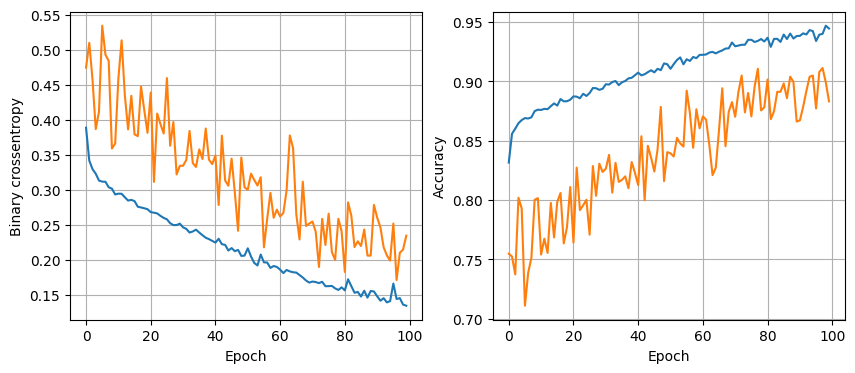

119/119 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.8601
64 nodes, 0 dropout, 0.005 learning rate, 32 batchsize
Epoch 1/100
374/374 [==============================] - 3s 5ms/step - loss: 0.3810 - accuracy: 0.8358 - val_loss: 0.6238 - val_accuracy: 0.6692
Epoch 2/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3365 - accuracy: 0.8571 - val_loss: 0.4267 - val_accuracy: 0.7565
Epoch 3/100
374/374 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.8636 - val_loss: 0.5241 - val_accuracy: 0.7291
Epoch 4/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.8675 - val_loss: 0.4947 - val_accuracy: 0.7589
Epoch 5/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3137 - accuracy: 0.8691 - val_loss: 0.4101 - val_accuracy: 0.7866
Epoch 6/100
374/374 [==============================] - 2s 4ms/step - loss: 0.3109 - accuracy: 0.8691 - val_loss: 0.4188 - val_accuracy: 0.773

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, {dropout_prob} dropout, {lr} learning rate, {batch_size} batchsize")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss <  least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))


119/119 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1339
           1       0.86      0.96      0.91      2465

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.85      3804
weighted avg       0.87      0.87      0.87      3804



0.3052324950695038